## 使用梯度上升法实现PCA

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

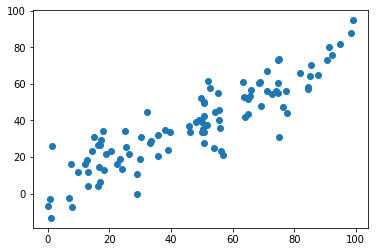

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean(中心化)

In [11]:
def demean(X):
    return X - np.mean(X, axis=0) #axis=0  为每一列求一个平均值

In [12]:
X_demean = demean(X)

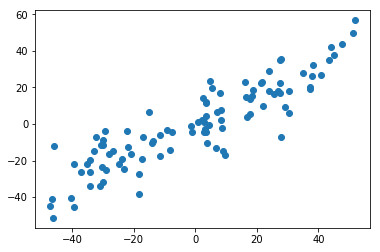

In [13]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [14]:
np.mean(X_demean[:,0])

-9.912071163853398e-15

In [15]:
np.mean(X_demean[:,1])

3.552713678800501e-16

### 梯度上升法

In [16]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [17]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.6380188 , 0.43933359])

In [18]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [19]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7693034 , 0.63888361])

In [20]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.7693034 , 0.63888361])

In [21]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

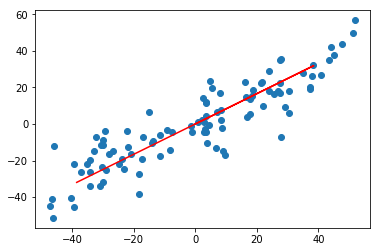

In [24]:
plt.scatter(X_demean[:,0], X_demean[:,1])
#plt.plot(x,y,..) 当x和y是数组时，x[]表示横坐标上的点，y[]表示纵坐标上的点
plt.plot([0, w[0]*50,-w[0]*50], [0, w[1]*50,-w[1]*50], color='r')
plt.show()

### 使用极端数据集测试

In [16]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

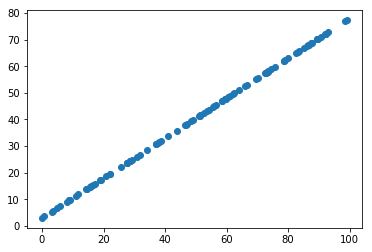

In [17]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [18]:
X2_demean = demean(X2)

In [19]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

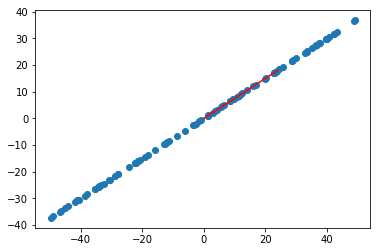

In [20]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）